In [24]:
import pathlib

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics, tree, model_selection

In [27]:
WINE_QUALITY_CSV = pathlib.Path("../data/winequality-red.csv")

In [2]:
df = pd.read_csv("../data/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.loc[:, "quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
}

df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [7]:
# pandas.DataFrame.sample(frac=1) == shuffle
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.head(1000)

df_test = df.tail(599)

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=3)

features = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
]
target = "quality"

clf.fit(df_train[features], df_train[target])

DecisionTreeClassifier(max_depth=3)

In [11]:
train_predictions = clf.predict(df_train[features])

test_predictions = clf.predict(df_test[features])

train_accuracy = metrics.accuracy_score(
    df_train[target], train_predictions,
)

test_accuracy = metrics.accuracy_score(
    df_test[target], test_predictions,
)

In [12]:
print(f"{train_accuracy, test_accuracy = }")

train_accuracy, test_accuracy = (0.587, 0.5726210350584308)


In [14]:
clf_7 = tree.DecisionTreeClassifier(max_depth=7)
clf_7.fit(df_train[features], df_train[target])

train_predictions_7 = clf_7.predict(df_train[features])

test_predictions_7 = clf_7.predict(df_test[features])

train_accuracy_7 = metrics.accuracy_score(
    df_train[target], train_predictions_7,
)

test_accuracy_7 = metrics.accuracy_score(
    df_test[target], test_predictions_7,
)

print(f"Train accuracy and test accuracy, with max decision tree depth of 7 = {train_accuracy_7, test_accuracy_7}")

Train accuracy and test accuracy, with max decision tree depth of 7 = (0.775, 0.6076794657762938)


In [18]:
# Set matplotlib run time configurations:
matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)

In [19]:
# Display the plots inside of the notebook:
%matplotlib inline

In [20]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [21]:
for depth in range(1, 26):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[features], df_train[target])
    train_predictions = clf.predict(df_train[features])
    test_predictions = clf.predict(df_test[features])
    train_accuracy = metrics.accuracy_score(df_train[target], train_predictions)
    test_accuracy = metrics.accuracy_score(df_test[target], test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

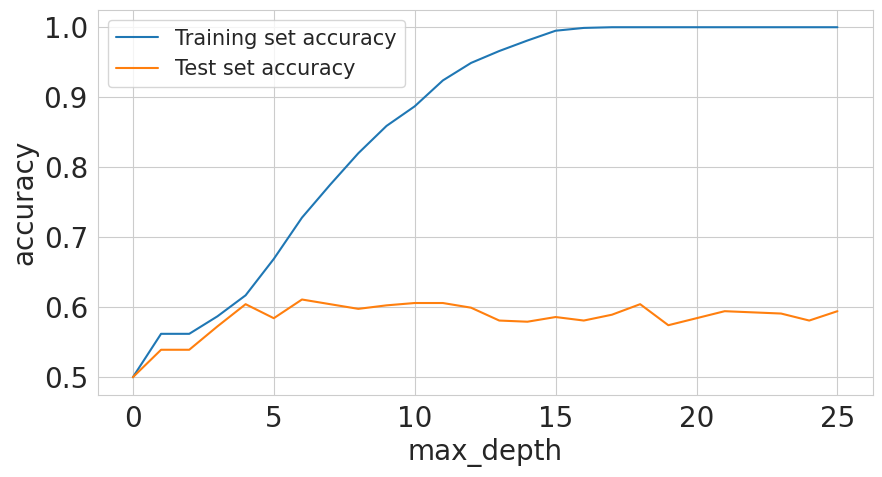

In [22]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="Training set accuracy")
plt.plot(test_accuracies, label="Test set accuracy")
plt.legend(loc="upper left", prop={"size": 15})
plt.xticks(range(0, 27, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [42]:
def k_fold_cross_validate(data_csv, k=5):
    """Split dataset in `data_csv` into `k` folds.

    Args:
        data_csv: CSV with the data in it.
        k: number of folds; defaults to 5. Must be >= 2.

    Returns:
        df, with data split into random folds, specified in a new 
        `k_fold` column.

    Side Effects:
        Writes the output df to a CSV in the CWD, with "_{k}_fold"
        added to the end of the file name. 
    """
    # TODO (possible improvements if this was a "serious" library
    # function):
    # * accept other input formats e.g. Parquet
    # * take RNG seed as an optional parameter
    # * take output file name as an optional parameter
    # * take fold # column name as an optional parameter
    df = pd.read_csv(data_csv)
    df["k_fold"] = -1
    # shuffle
    df = df.sample(frac=1).reset_index(drop=True)
    kf = model_selection.KFold(n_splits=5)
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, "k_fold"] = fold
    folds_csv_name = pathlib.Path(data_csv).stem + f"_{k}_fold.csv"
    df.to_csv(folds_csv_name, index=False)
    return df

In [39]:
wine_quality_with_folds = k_fold_cross_validate(WINE_QUALITY_CSV, k=5)

In [40]:
wine_quality_with_folds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_fold
0,6.0,0.50,0.04,2.20,0.092,13.0,26.0,0.99647,3.46,0.47,10.0,5,0
1,8.0,1.18,0.21,1.90,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,5,0
2,10.5,0.42,0.66,2.95,0.116,12.0,29.0,0.99700,3.24,0.75,11.7,7,0
3,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5,0
4,11.9,0.38,0.51,2.00,0.121,7.0,20.0,0.99960,3.24,0.76,10.4,6,0


In [41]:
wine_quality_with_folds.k_fold.unique()

array([0, 1, 2, 3, 4])

In [43]:
def run_k_fold(df_with_folds, features, target, k):
    for fold in range(k):
        test = df_with_folds.loc[df_with_folds["k_fold"] == fold].reset_index()
        train = df_with_folds.loc[df_with_folds["k_fold"] != fold].reset_index()
        clf = tree.DecisionTreeClassifier(max_depth=3)
        clf.fit(train[features], train[target])
        train_predictions = clf.predict(train[features])
        test_predictions = clf.predict(test[features])
        train_accuracy = metrics.accuracy_score(train_predictions, train[target])
        test_accuracy = metrics.accuracy_score(test_predictions, test[target])
        print(f"Fold {fold}\t: {train_accuracy, test_accuracy = }")

In [44]:
run_k_fold(wine_quality_with_folds, features, target, 5)

Fold 0	: train_accuracy, test_accuracy = (0.5731039874902267, 0.60625)
Fold 1	: train_accuracy, test_accuracy = (0.6035965598123534, 0.534375)
Fold 2	: train_accuracy, test_accuracy = (0.5832681782642689, 0.515625)
Fold 3	: train_accuracy, test_accuracy = (0.5856137607505864, 0.553125)
Fold 4	: train_accuracy, test_accuracy = (0.59453125, 0.5611285266457681)
